In [73]:
# imports
!pip install torch torch-geometric scikit-learn


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [74]:
%ls

01-create-network-graph_2.ipynb
01-create-network-graph.ipynb
hr_ai.ipynb
patients_graph_max_1000_nodes.gpickle
patients_graph_max_1000_nodes_similar.gpickle
patients_graph_max_10_nodes.gpickle
patients_graph_max_10_nodes_similar.gpickle


In [4]:
%cd drive/MyDrive/AI_in_Healthcare/high_risk_project/2_approach/

/content/drive/MyDrive/AI_in_Healthcare/high_risk_project/2_approach


In [44]:
%ls

01-create-network-graph_2.ipynb
01-create-network-graph.ipynb
hr_ai.ipynb
patients_graph_max_1000_nodes.gpickle
patients_graph_max_1000_nodes_similar.gpickle
patients_graph_max_10_nodes.gpickle
patients_graph_max_10_nodes_similar.gpickle


# working pickle file

In [6]:
# PICKLE_FILE_NAME = 'patients_graph_max_10_nodes.gpickle'
# PICKLE_FILE_NAME_SIMILARITY = 'patients_graph_max_10_nodes_similar.gpickle'

In [75]:
PICKLE_FILE_NAME = 'patients_graph_max_1000_nodes.gpickle'
PICKLE_FILE_NAME_SIMILARITY = 'patients_graph_max_1000_nodes_similar.gpickle'

#Load Graph Netwprk from Pickle

In [76]:
import pickle

# Load the graph from a pickle file
with open(f"{PICKLE_FILE_NAME}", "rb") as f:
    G = pickle.load(f)
    print("Graph loaded from pickle file")

print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

print(" ")

# Load the similarity graph from a pickle file
with open(f"{PICKLE_FILE_NAME_SIMILARITY}", "rb") as f:
    G_sim = pickle.load(f)
    print("Graph loaded from pickle file")

print(f"Number of nodes: {G_sim.number_of_nodes()}")
print(f"Number of edges: {G_sim.number_of_edges()}")

Graph loaded from pickle file
Number of nodes: 465
Number of edges: 37361
 
Graph loaded from pickle file
Number of nodes: 465
Number of edges: 1182


#Debug

#View Nodes: Connected Network X Graph

In [77]:
iter = G.nodes(data=True)
count = 0

print("Each node has the patient subject id, followed with a dictionary")
print("Nodes in the networkx graph:")
for node in iter:
    # some prints to help understand the structure of the nodes
    print(f"\t{node}")
    count += 1
    if count > 5:
        break

Each node has the patient subject id, followed with a dictionary
Nodes in the networkx graph:
	(4074, {'gender': 'M', 'age': '2121-08-01 00:00:00', 'age_bucket': 80, 'hadm_id': 137421, 'size': 10})
	(90889, {'gender': 'M', 'age': '2095-04-29 00:00:00', 'age_bucket': 55, 'hadm_id': 168745, 'size': 10})
	(72753, {'gender': 'M', 'age': '2042-06-01 00:00:00', 'age_bucket': 85, 'hadm_id': 144029, 'size': 10})
	(64908, {'gender': 'M', 'age': '2108-04-22 00:00:00', 'age_bucket': 75, 'hadm_id': 172851, 'size': 10})
	(70273, {'gender': 'F', 'age': '2090-05-28 00:00:00', 'age_bucket': 75, 'hadm_id': 102912, 'size': 10})
	(92025, {'gender': 'F', 'age': '1842-07-16 00:00:00', 'age_bucket': 95, 'hadm_id': 160456, 'size': 10})


#View Edges: Connected Network X Graph

In [78]:
iter = G.edges(data=True)
count = 0

print("Each edge has the source patient subject id, and the target patient subject id followed with a dictionary")
print("Edges in the networkx graph:")
for edge in iter:
    # some prints to help understand the structure of the edges
    print(f"\t{edge}")
    count += 1
    if count > 5:
        break

Each edge has the source patient subject id, and the target patient subject id followed with a dictionary
Edges in the networkx graph:
	(4074, 50049, {'icd9': '78552', 'short_title': 'Septic shock', 'width': 1})
	(4074, 82433, {'icd9': '78552', 'short_title': 'Septic shock', 'width': 1})
	(4074, 69769, {'icd9': '0389', 'short_title': 'Septicemia NOS', 'width': 1})
	(4074, 22421, {'icd9': '78552', 'short_title': 'Septic shock', 'width': 1})
	(4074, 1687, {'icd9': '78552', 'short_title': 'Septic shock', 'width': 1})
	(4074, 97560, {'icd9': '78552', 'short_title': 'Septic shock', 'width': 1})


# View Nodes: Similarity Network X Graph

In [79]:
iter = G_sim.nodes(data=True)
count = 0

print("Nodes in the networkx similarity graph:")
for node in iter:
    # some prints to help understand the structure of the nodes
    print(f"\t{node}")
    count += 1
    if count > 5:
        break

Nodes in the networkx similarity graph:
	(4074, {'similarity': np.float64(0.583), 'size': 10})
	(90889, {'similarity': np.float64(0.447), 'size': 10})
	(72753, {'similarity': np.float64(0.505), 'size': 10})
	(64908, {'similarity': np.float64(0.309), 'size': 10})
	(70273, {'similarity': np.float64(0.303), 'size': 10})
	(92025, {'similarity': np.float64(0.219), 'size': 10})


#View Edges: Similarity networkx graph

In [80]:
iter = G_sim.edges(data=True)
count = 0

print("Each edge has the source patient subject id, and the target patient subject id followed with the similarity score between the two patients")
print("Edges in the networkx graph:")
for edge in iter:
    # some prints to help understand the structure of the edges
    print(f"\t{edge}")
    count += 1
    if count > 5:
        break

Each edge has the source patient subject id, and the target patient subject id followed with the similarity score between the two patients
Edges in the networkx graph:
	(4074, 10139, {'similarity': np.float64(0.583), 'width': 1})
	(4074, 92861, {'similarity': np.float64(0.583), 'width': 1})
	(4074, 21280, {'similarity': np.float64(0.583), 'width': 1})
	(90889, 1753, {'similarity': np.float64(0.535), 'width': 1})
	(90889, 64123, {'similarity': np.float64(0.447), 'width': 1})
	(90889, 85958, {'similarity': np.float64(0.447), 'width': 1})


# Convert to PyTorch Geometric Data Object

In [81]:
def get_icd9_list(G):

    iter = G.edges(data=True)
    count = 0

    icd9_set = set()

    for edge in iter:

        icd9_set.add(edge[2]['icd9'])

    # print(icd9_set)
    # print(list(icd9_set))
    return list(icd9_set)

In [82]:
def short_title_list(G):

    iter = G.edges(data=True)
    count = 0

    short_title_set = set()

    for edge in iter:

        short_title_set.add(edge[2]['short_title'])

    # print(icd9_set)
    # print(list(icd9_set))
    return list(short_title_set)


In [83]:
icd9_list = get_icd9_list(G)
short_title_list = short_title_list(G)

In [84]:
short_title_list

['Hyperlipidemia NEC/NOS',
 'Ac diastolic hrt failure',
 'Kidney transplant status',
 'Ulcer other part of foot',
 'FB respiratory tree NOS',
 'Pulmonary collapse',
 'Insomnia NOS',
 'Protein-cal malnutr NOS',
 'Food/vomit pneumonitis',
 'Loc osteoarth NOS-l/leg',
 'Sed,hyp,anxiolytc ab-NOS',
 'Diabetic retinopathy NOS',
 'Pleural effusion NOS',
 'Heavy-for-date infan NEC',
 'Abnormal glucose NEC',
 'AMI NOS, initial',
 'Sleep apnea NOS',
 'Chr airway obstruct NEC',
 "Barrett's esophagus",
 'Spondylos NOS w/o myelop',
 'Pulm embol/infarct NEC',
 'Benign neoplasm lg bowel',
 'Neoplasm related pain',
 'Nausea with vomiting',
 'Renal dialysis status',
 'Umbilical hernia',
 'Sec mal neo brain/spine',
 'Ocl crtd art wo infrct',
 'Chr ischemic hrt dis NEC',
 'Abn react-org transplant',
 'Arthrodesis status',
 'Other postop infection',
 'Abn react-cardiac cath',
 'Osteoarthros NOS-unspec',
 'Fam hx-diabetes mellitus',
 'Abn involun movement NEC',
 'Late ef-hemplga side NOS',
 'Alcohol withdra

In [92]:
from torch_geometric.utils import from_networkx
import torch


# Define encoding for gender
gender_map = {'M': 0, 'F': 1}
# Select the features to include in the node feature matrix
for node in G.nodes():

# now we will add the nodes to torch geometric, we need to map categorical values to int
    gender_ = gender_map[G.nodes[node]['gender']]
    age_bucket = G.nodes[node]['age_bucket']
    # hadm_id = G.nodes[node]['hadm_id']
    # size = G.nodes[node]['size']
    G.nodes[node]['x'] = [gender_, age_bucket]

    # You can normalize or scale here if needed

# now we are going to add the edges to torch geometric
# define the encoding for icd9
icd9_map = {code: i for i, code in enumerate(icd9_list)}
short_title_map = {title: i for i, title in enumerate(short_title_list)}

# now we will convert the edges in valid datatypes
for u, v, attr in G.edges(data=True):
    attr['icd9_code'] = icd9_map[attr['icd9']]
    attr['short_title_code'] = short_title_map[attr['short_title']]
    attr['edge_attr'] = [attr['icd9_code'], attr['short_title_code']]
    G.add_edge(u, v, **attr)


# Convert the NetworkX graph to a PyG Data object
pyg_data = from_networkx(G)

# Rename 'x' field to match PyG format
pyg_data.x = torch.tensor([G.nodes[n]['x'] for n in G.nodes], dtype=torch.float)

# Edge index is already handled by from_networkx
print(pyg_data)

Data(x=[465, 2], edge_index=[2, 74722], edge_attr=[74722, 2], gender=[465], age=[465], age_bucket=[465], hadm_id=[465], size=[465], icd9=[74722], short_title=[74722], width=[74722], icd9_code=[74722], short_title_code=[74722])


In [88]:
# pyg_data.short_title

In [93]:
print(f"PyG Data object:\n{pyg_data}")
print(f"Number of nodes: {pyg_data.num_nodes}")
print(f"Number of edges: {pyg_data.num_edges}")
print(f"Feature shape: {pyg_data.x.shape}")

PyG Data object:
Data(x=[465, 2], edge_index=[2, 74722], edge_attr=[74722, 2], gender=[465], age=[465], age_bucket=[465], hadm_id=[465], size=[465], icd9=[74722], short_title=[74722], width=[74722], icd9_code=[74722], short_title_code=[74722])
Number of nodes: 465
Number of edges: 74722
Feature shape: torch.Size([465, 2])


In [94]:
pyg_data.x

tensor([[ 0., 80.],
        [ 0., 55.],
        [ 0., 85.],
        [ 0., 75.],
        [ 1., 75.],
        [ 1., 95.],
        [ 1., 50.],
        [ 0., 85.],
        [ 1., 85.],
        [ 1., 65.],
        [ 1., 75.],
        [ 1., 65.],
        [ 1., 80.],
        [ 0., 65.],
        [ 0., 70.],
        [ 0., 65.],
        [ 0., 75.],
        [ 0., 75.],
        [ 0., 65.],
        [ 0.,  0.],
        [ 0., 80.],
        [ 1., 55.],
        [ 0., 70.],
        [ 1., 80.],
        [ 0., 35.],
        [ 0., 55.],
        [ 0., 45.],
        [ 0., 65.],
        [ 1.,  0.],
        [ 0., 45.],
        [ 1.,  0.],
        [ 1., 40.],
        [ 0., 40.],
        [ 0., 80.],
        [ 1., 80.],
        [ 1., 85.],
        [ 0.,  0.],
        [ 0., 55.],
        [ 0., 95.],
        [ 1., 65.],
        [ 0., 45.],
        [ 0., 75.],
        [ 0., 45.],
        [ 0., 45.],
        [ 0., 45.],
        [ 1., 50.],
        [ 0.,  0.],
        [ 0., 55.],
        [ 1., 20.],
        [ 1.,  0.],


In [95]:
# Step 1: Get number of nodes
num_nodes = pyg_data.x.size(0)  # Should be 100
print(f"[INFO] Number of nodes: {num_nodes}")

[INFO] Number of nodes: 465


In [96]:
# Step 2: Check how many invalid edges exist
invalid_mask = (pyg_data.edge_index >= num_nodes).any(dim=0)
num_invalid = invalid_mask.sum().item()
print(f"[INFO] Number of invalid edges (with index >= {num_nodes}): {num_invalid}")

[INFO] Number of invalid edges (with index >= 465): 0


In [97]:
# Optional: Show a few bad edges
if num_invalid > 0:
    print("[DEBUG] Sample invalid edges:")
    print(pyg_data.edge_index[:, invalid_mask][:, :5])  # Print first 5 invalid ones

In [98]:
# Step 3: Create valid mask and apply it
valid_mask = (pyg_data.edge_index < num_nodes).all(dim=0)
pyg_data.edge_index = pyg_data.edge_index[:, valid_mask]
print(f"[INFO] edge_index shape after filtering: {pyg_data.edge_index.shape}")

[INFO] edge_index shape after filtering: torch.Size([2, 74722])


#Step 4: Define a GNN to Learn Patient Representations

We'll use a Graph Convolutional Network (GCN) from torch_geometric.nn to learn node embeddings that capture each patient’s information and relationship to others in the graph.

Since this is about patient similarity, we’ll:

Train the model using an unsupervised objective

Use the learned embeddings later to compute similarity (e.g., cosine similarity) between patients

# 1. Define a Simple GCN

In [99]:
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class PatientGNN(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(PatientGNN, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return x  # This will be the final embedding of each patient

This is the initializer. You're setting up the layers of your GNN:

in_channels: Number of input features per node (e.g., age, vitals, etc.)

hidden_channels: Size of the hidden layer (intermediate representation)

out_channels: Size of the output embedding vector

These are two graph convolution layers:

GCNConv is a message-passing layer that aggregates features from neighboring nodes.

The first layer takes the raw features → hidden representation.

The second layer refines that hidden representation → final embedding.

This is the forward pass. It defines how the input flows through the model.

x: Node features (tensor of shape [num_nodes, in_channels])

edge_index: Graph connectivity, shape [2, num_edges], with source/target node indices

#2. Train GNN Using Similarity Loss

We'll use cosine similarity loss between connected and unconnected node pairs:

Similar patients → higher cosine similarity

Dissimilar patients → lower similarity

Here's a basic training loop:


In [111]:
data.num_node_features

4

In [106]:
import torch
import torch.nn.functional as F

def train_similarity_model(data, embedding_dim=128, epochs=10, lr=0.001):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = PatientGNN(data.num_node_features, 512, embedding_dim).to(device)
    data = data.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()

        # print(f'mika {data.x.shape} ' )

        embeddings = model(data.x, data.edge_index)  # shape [N, embedding_dim]

        # print(f'mika after {data.x.shape} ' )
        # Sample positive edges (existing ones)
        pos_edge_index = data.edge_index.t()

        # Sample negative edges (non-existent edges)
        num_pos = pos_edge_index.shape[0]
        all_nodes = torch.arange(data.num_nodes, device=device)
        rand_src = all_nodes[torch.randint(0, data.num_nodes, (num_pos,), device=device)]
        rand_dst = all_nodes[torch.randint(0, data.num_nodes, (num_pos,), device=device)]
        neg_edge_index = torch.stack([rand_src, rand_dst], dim=1)

        # Compute similarities
        pos_sim = F.cosine_similarity(embeddings[pos_edge_index[:, 0]], embeddings[pos_edge_index[:, 1]])
        neg_sim = F.cosine_similarity(embeddings[neg_edge_index[:, 0]], embeddings[neg_edge_index[:, 1]])

        # Loss: encourage higher similarity for positive edges and lower for negative
        loss = -torch.log(torch.sigmoid(pos_sim)).mean() - torch.log(1 - torch.sigmoid(neg_sim)).mean()

        loss.backward()
        optimizer.step()

        if epoch % 1 == 0:
            print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

    return model


In [107]:
trained_model = train_similarity_model(pyg_data, embedding_dim=128)


Epoch 0, Loss: 1.5892
Epoch 1, Loss: 1.5456
Epoch 2, Loss: 1.4874
Epoch 3, Loss: 1.4289
Epoch 4, Loss: 1.3879
Epoch 5, Loss: 1.3638
Epoch 6, Loss: 1.3533
Epoch 7, Loss: 1.3521
Epoch 8, Loss: 1.3482
Epoch 9, Loss: 1.3466


#Step 5: Evaluate Similarity Between Patients Using the GNN.

Now that the GNN model has learned embeddings for each patient, we can:

Extract those embeddings

Compute pairwise similarity

Find similar patients (for a given patient)

Optionally, visualize clusters or neighbor relationships

#1. Extract **Embeddings**

In [108]:
import torch.nn.functional as F

# Put model in eval mode and move to CPU (for inference)
trained_model.eval()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
pyg_data = pyg_data.to(device)
with torch.no_grad():
    embeddings = trained_model(pyg_data.x, pyg_data.edge_index).cpu()  # shape [num_nodes, embedding_dim]

# 2. Compute Cosine Similarity Matrix

In [109]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Convert to numpy
embedding_matrix = embeddings.numpy()

# Cosine similarity between each pair of patients
similarity_matrix = cosine_similarity(embedding_matrix)

# Optional: create a DataFrame for better readability
similarity_df = pd.DataFrame(similarity_matrix)
similarity_df.index.name = "Patient_ID"
similarity_df.columns.name = "Similar_To"
similarity_df.round(3).head(10)  # Show top 10x10 matrix

Similar_To,0,1,2,3,4,5,6,7,8,9,...,455,456,457,458,459,460,461,462,463,464
Patient_ID,,,,,,,,,,,,,,,,,,,,,
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,-0.827,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,-0.827,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,-0.827,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,-0.827,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,-0.827,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,-0.827,1.0,1.0,1.0
6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,-0.827,1.0,1.0,1.0
7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,-0.827,1.0,1.0,1.0
8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,-0.827,1.0,1.0,1.0


# 3. Find Most Similar Patients

In [110]:
def find_similar_patients(patient_id, top_k=5):
    sim_scores = similarity_matrix[patient_id]
    top_indices = sim_scores.argsort()[::-1][1:top_k+1]  # Skip self
    return top_indices, sim_scores[top_indices]

# Example: get top 5 most similar to patient 3
similar_ids, similarities = find_similar_patients(3)
print("Top similar patients to patient 3:")
for pid, score in zip(similar_ids, similarities):
    print(f"Patient {pid} with similarity score: {score:.3f}")

Top similar patients to patient 3:
Patient 365 with similarity score: 1.000
Patient 451 with similarity score: 1.000
Patient 400 with similarity score: 1.000
Patient 320 with similarity score: 1.000
Patient 387 with similarity score: 1.000


# 4. Visualize the Graph with Similarity-Based Colors (Optional)

In [68]:
from torch_geometric.utils import to_networkx


ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

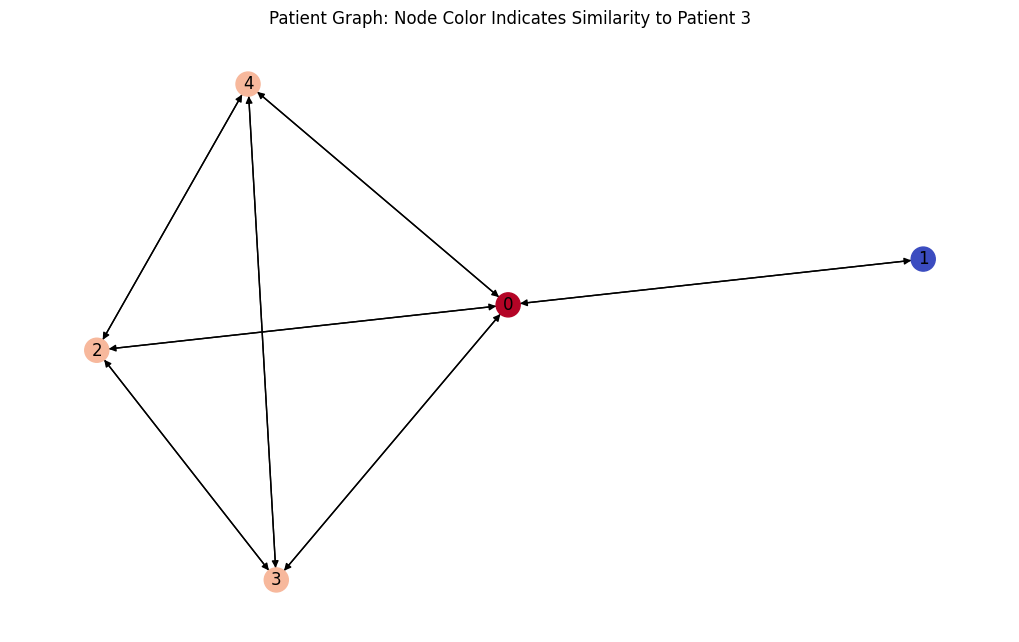

In [39]:
import matplotlib.pyplot as plt
import networkx as nx

# Convert PyG back to NetworkX for visualization
G_nx = to_networkx(pyg_data)

# Use similarity to a patient as color (e.g. to patient 3)
similarity_to_p3 = similarity_matrix[3]
colors = similarity_to_p3

plt.figure(figsize=(10, 6))
nx.draw(G_nx, node_color=colors, with_labels=True, cmap=plt.cm.coolwarm, node_size=300)
plt.title("Patient Graph: Node Color Indicates Similarity to Patient 3")
plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.coolwarm), label="Cosine Similarity")
plt.show()

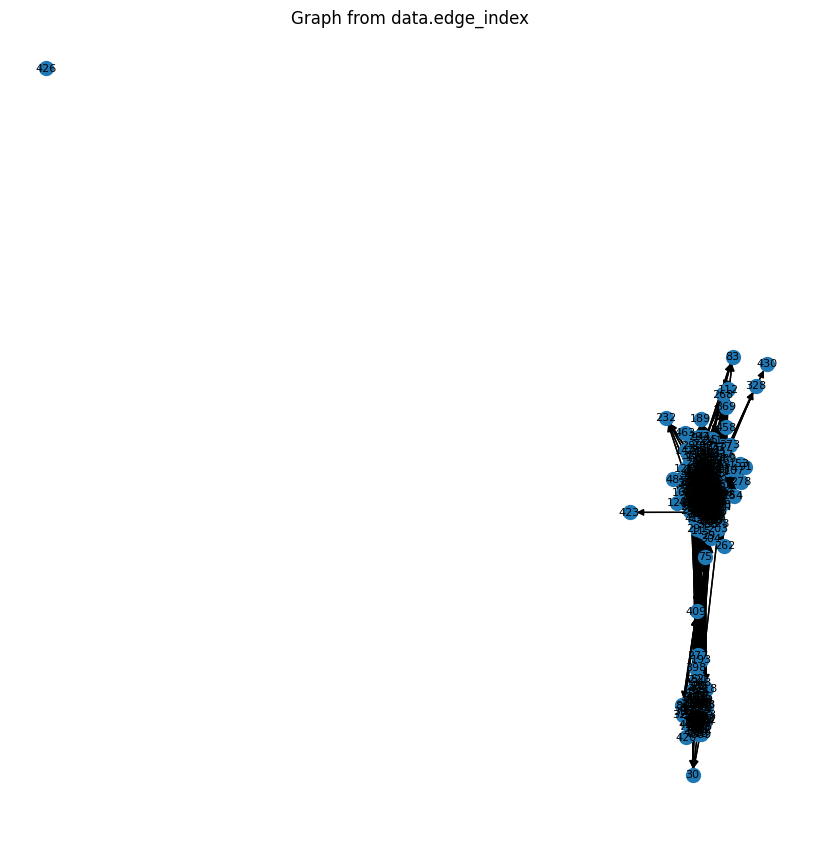

In [69]:
from torch_geometric.utils import to_networkx
import matplotlib.pyplot as plt

G = to_networkx(pyg_data)
plt.figure(figsize=(8, 8))
nx.draw(G, with_labels=True, node_size=100, font_size=8)
plt.title("Graph from data.edge_index")
plt.show()

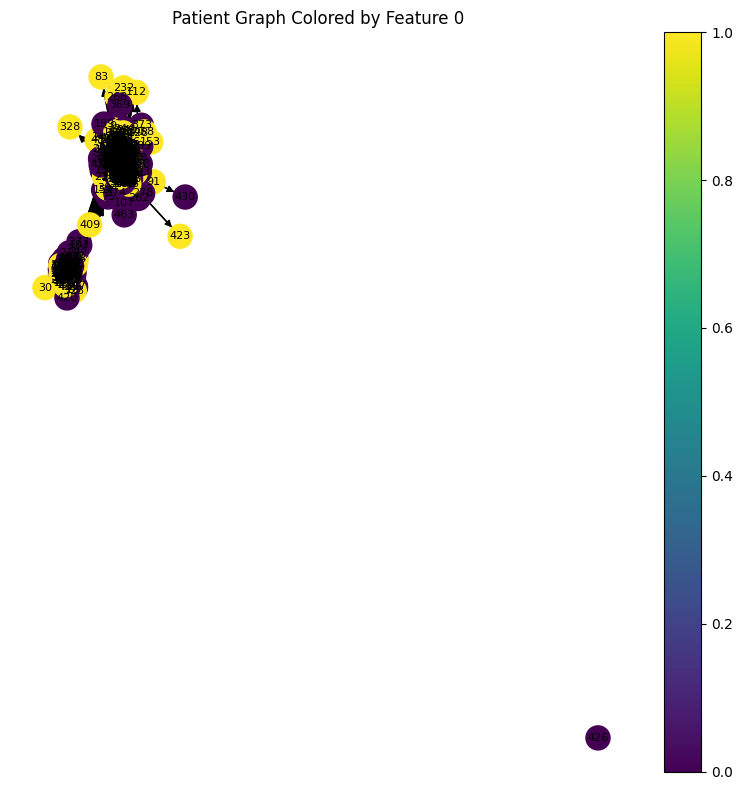

In [70]:
import torch
import matplotlib.pyplot as plt
import networkx as nx
from torch_geometric.utils import to_networkx

# Convert PyG graph to NetworkX
G = to_networkx(pyg_data)

# Optional: color nodes by feature or degree
node_color = pyg_data.x[:, 0].cpu().numpy()  # example: use first feature

# Plot
fig, ax = plt.subplots(figsize=(8, 8))
pos = nx.spring_layout(G)  # layout
nodes = nx.draw_networkx_nodes(G, pos, node_color=node_color, cmap='viridis', ax=ax)
nx.draw_networkx_edges(G, pos, ax=ax)
nx.draw_networkx_labels(G, pos, font_size=8, ax=ax)

# Add colorbar
sm = plt.cm.ScalarMappable(cmap='viridis')
sm.set_array(node_color)
plt.colorbar(sm, ax=ax)

plt.title("Patient Graph Colored by Feature 0")
plt.axis('off')
plt.tight_layout()
plt.show()

In [16]:
import networkx as nx
import numpy as np

G = nx.Graph()

# Add nodes with features
G.add_node(4074, similarity=np.float64(0.202), size=10)
G.add_node(90889, similarity=np.float64(0.116), size=10)
G.add_node(72753, similarity=np.float64(0.202), size=10)
G.add_node(64908, similarity=np.float64(0.148), size=10)
G.add_node(70273, similarity=np.float64(0.148), size=10)

# Add some example edges
G.add_edges_from([
    (4074, 90889),
    (4074, 72753),
    (72753, 70273),
    (64908, 70273)
])


In [35]:
for node in G.nodes():
    print(G.nodes[node])

{'gender': 'M', 'age': '2121-08-01 00:00:00', 'age_bucket': 80, 'hadm_id': 137421, 'size': 10, 'x': [0, 80, 137421, 10]}
{'gender': 'M', 'age': '2095-04-29 00:00:00', 'age_bucket': 55, 'hadm_id': 168745, 'size': 10, 'x': [0, 55, 168745, 10]}
{'gender': 'M', 'age': '2042-06-01 00:00:00', 'age_bucket': 85, 'hadm_id': 144029, 'size': 10, 'x': [0, 85, 144029, 10]}
{'gender': 'M', 'age': '2108-04-22 00:00:00', 'age_bucket': 75, 'hadm_id': 172851, 'size': 10, 'x': [0, 75, 172851, 10]}
{'gender': 'F', 'age': '2090-05-28 00:00:00', 'age_bucket': 75, 'hadm_id': 102912, 'size': 10, 'x': [1, 75, 102912, 10]}


In [46]:
def get_icd9_list(G):

    iter = G.edges(data=True)
    count = 0

    icd9_set = set()

    for edge in iter:

        icd9_set.add(edge[2]['icd9'])

    # print(icd9_set)
    # print(list(icd9_set))
    return list(icd9_set)


In [47]:
get_icd9_list(G)

['5789', '2724', 'V5861', '496', '42731', 'V1046', '2720']

In [50]:
iter = G.edges(data=True)
count = 0

icd9_set = set()

print("Each edge has the source patient subject id, and the target patient subject id followed with a dictionary")
print("Edges in the networkx graph:")
for edge in iter:
    # some prints to help understand the structure of the edges
    print(f"\t{edge}")
    # print(edge[2]['icd9'])
    # icd9_set.add(edge[2]['icd9'])

    count += 1
    if count > 5:
        break

    count += 1
    if count > 5:
        break
print(icd9_set)
print(list(icd9_set))

Each edge has the source patient subject id, and the target patient subject id followed with a dictionary
Edges in the networkx graph:
	(4074, 90889, {'icd9': '2724', 'short_title': 'Hyperlipidemia NEC/NOS', 'width': 1})
	(4074, 64908, {'icd9': '5789', 'short_title': 'Gastrointest hemorr NOS', 'width': 1})
	(4074, 72753, {'icd9': 'V1046', 'short_title': 'Hx-prostatic malignancy', 'width': 1})
set()
[]


In [51]:
from torch_geometric.utils import from_networkx
import torch


# Define encoding for gender
gender_map = {'M': 0, 'F': 1}
# Select the features to include in the node feature matrix
for node in G.nodes():

# now we will add the nodes to torch geometric, we need to map categorical values to int
    gender = gender_map[G.nodes[node]['gender']]
    age_bucket = G.nodes[node]['age_bucket']
    hadm_id = G.nodes[node]['hadm_id']
    size = G.nodes[node]['size']
    G.nodes[node]['x'] = [gender, age_bucket, hadm_id, size]

    # You can normalize or scale here if needed

# now we are going to add the edges to torch geometric
# define the encoding for icd9
icd9_map = {code: i for i, code in enumerate(icd9_list)}
# short_title_map = {title: i for i, title in enumerate(short_title_list)}

# now we will convert the edges in valid datatypes
for u, v, attr in G.edges(data=True):
    attr['icd9_code'] = icd9_map[attr['icd9']]

    attr['edge_attr'] = [attr['icd9_code'], attr['width']]
    G.add_edge(u, v, **attr)


# Convert the NetworkX graph to a PyG Data object
data = from_networkx(G)

# Rename 'x' field to match PyG format
data.x = torch.tensor([G.nodes[n]['x'] for n in G.nodes], dtype=torch.float)

# Edge index is already handled by from_networkx
print(data)

Data(x=[5, 4], edge_index=[2, 14], edge_attr=[14, 2], gender=[5], age=[5], age_bucket=[5], hadm_id=[5], size=[5], icd9=[14], short_title=[14], width=[14], icd9_code=[14])


In [52]:
data.x

tensor([[0.0000e+00, 8.0000e+01, 1.3742e+05, 1.0000e+01],
        [0.0000e+00, 5.5000e+01, 1.6874e+05, 1.0000e+01],
        [0.0000e+00, 8.5000e+01, 1.4403e+05, 1.0000e+01],
        [0.0000e+00, 7.5000e+01, 1.7285e+05, 1.0000e+01],
        [1.0000e+00, 7.5000e+01, 1.0291e+05, 1.0000e+01]])

In [26]:
from torch_geometric.utils import from_networkx
import torch

# Select the features to include in the node feature matrix
for node in G_sim.nodes():
    # You can normalize or scale here if needed
    G_sim.nodes[node]['x'] = [float(G_sim.nodes[node]['similarity']), G_sim.nodes[node]['size']]

# Convert the NetworkX graph to a PyG Data object
data = from_networkx(G_sim)

# Rename 'x' field to match PyG format
data.x = torch.tensor([G_sim.nodes[n]['x'] for n in G_sim.nodes], dtype=torch.float)

# Edge index is already handled by from_networkx
print(data)


Data(x=[5, 2], edge_index=[2, 18], similarity=[5], size=[5], edge_similarity=[18], width=[18])


In [27]:
data.x

tensor([[ 0.2020, 10.0000],
        [ 0.1160, 10.0000],
        [ 0.2020, 10.0000],
        [ 0.1480, 10.0000],
        [ 0.1480, 10.0000]])